<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course**
Authors: Vitaly Radchenko (@vradchenko), and [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Sergey Volkov (@sevaspb). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center> Assignment #5. Task </center> <a class="tocSkip">
## <center> Random Forest and Logistic Regression in credit scoring and movie reviews classification </center> <a class="tocSkip">
 
Random Forest and logistic regression are two algorithms that I personally use most often in day-to-day DS tasks. In this part of the assignment, we'll explore pros and cons of these two algorithms in two different tasks. 
 
Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Notebook](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 

**Your task is to:**
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://forms.gle/VvfLZiXfssf4aTBv7).
    

*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*

-----

<font color = 'red'> **Question 1:** </font> There are 9 jurors in the courtroom. Each of them individually can correctly determine whether the defendant is guilty or not with 75% probability. What is the probability that the jurors will jointly reach the correct verdict if the final decision is made by majority vote?

<font color = 'red'> **Answer options:** </font>
- 60.97%
- 80.00%
- 95.11%
- 96.66% 

In [1]:
import math

n= 9
p = 0.75
mew = 0
for i in range(n // 2 + 1, n + 1):
    mew += math.comb(n, i) * (p ** i) * ((1 - p)**(n - i))
print(mew)

0.9510726928710938


Now let's move directly to machine learning.

**Problem**

Predict whether the customer will repay their credit within 90 days. This is a binary classification problem; we will assign customers into good or bad categories based on our prediction.

**Data description**

| Feature | Variable Type | Value Type | Description |
|:--------|:--------------|:-----------|:------------|
| age | Input Feature | integer | Customer age |
| DebtRatio | Input Feature | real | Total monthly loan payments (loan, alimony, etc.) / Total monthly income percentage |
| NumberOfTime30-59DaysPastDueNotWorse | Input Feature | integer | The number of cases when client has overdue 30-59 days (not worse) on other loans during the last 2 years |
| NumberOfTimes90DaysLate | Input Feature | integer | Number of cases when customer had 90+dpd overdue on other credits |
| NumberOfTime60-89DaysPastDueNotWorse | Input Feature | integer | Number of cased when customer has 60-89dpd (not worse) during the last 2 years |
| NumberOfDependents | Input Feature | integer | The number of customer dependents |
| SeriousDlqin2yrs | Target Variable | binary: <br>0 or 1 | Customer hasn't paid the loan debt within 90 days |


In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sharper plots
%config InlineBackend.figure_format = 'retina'

Let us implement a function that will replace the NaN values by the median in each column of the table.

In [6]:
def impute_nan_with_median(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

Further, we read the data into a dataframe. No need to download anything, the requisite file `data/credit_scoring_sample.csv.zip` is not large and it goes with the archive with bonus assignments.

In [9]:
PATH_TO_DATA = Path("../../_static/data/assignment5/")

In [11]:
data = pd.read_csv(PATH_TO_DATA / "credit_scoring_sample.csv.zip", sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


View data types of the features:

In [14]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Look at the distribution of the target variable:

Distribution of target:


SeriousDlqin2yrs
0    0.777511
1    0.222489
Name: proportion, dtype: float64

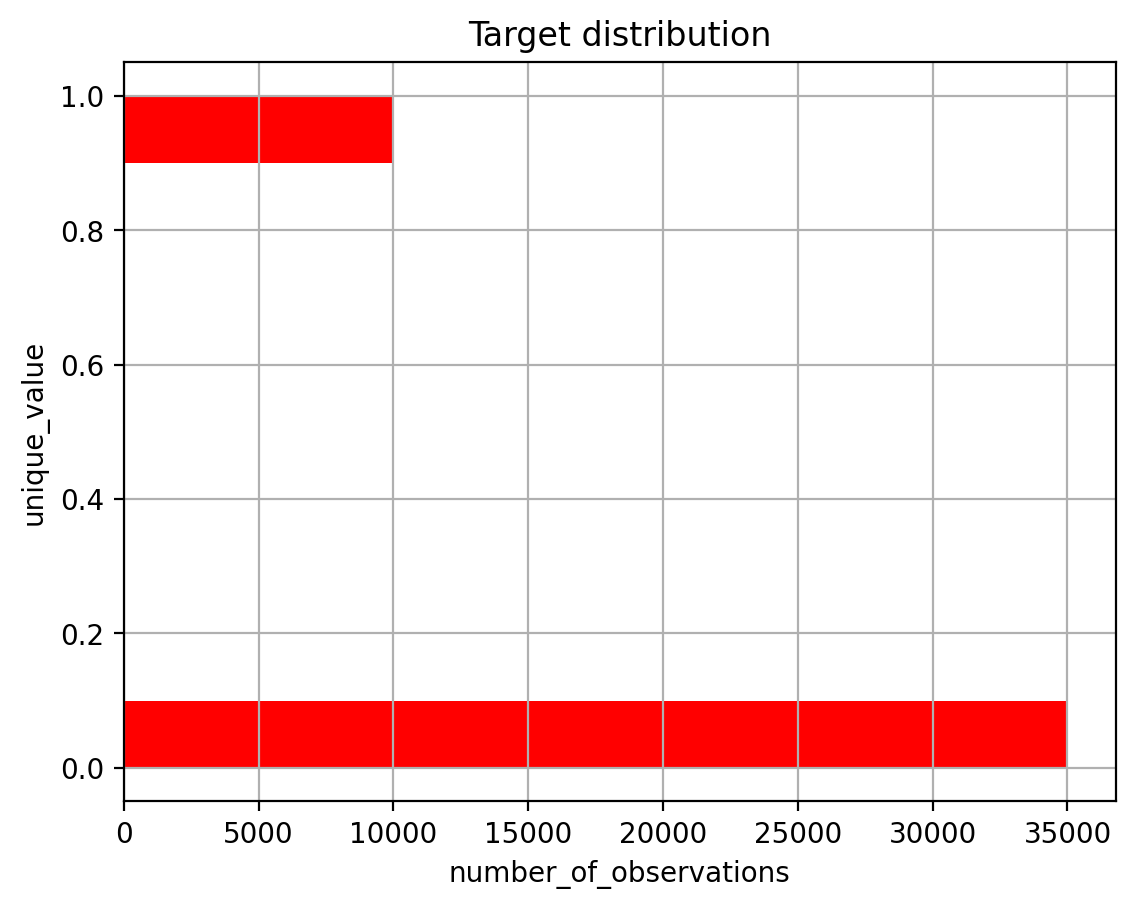

In [17]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of target:")
data["SeriousDlqin2yrs"].value_counts(normalize=True)

Select all the features and drop the target:

In [20]:
independent_columns_names = data.columns.values
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

We apply a function that replaces all NaN values with the median value of the corresponding feature.

In [23]:
table = impute_nan_with_median(data)

Split the target and features - now we get a training set.

In [26]:
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

### Bootstrap  <a class="tocSkip">

**<font color = 'red'> Question 2. </font>** Make an interval estimate based on the bootstrap (2000 samples) of the average income (MonthlyIncome)  of customers who had overdue loan payments, and of those who paid in time, make 80% confidence interval. Use target value (SeriousDlqin2yrs) to split data. Find the difference between the lower limit of the derived interval for those who paid in time and the upper limit for those who are overdue.
So, you are asked to build 80% intervals for the income of "good" customers `[good_income_lower, good_income_upper]` and for "bad" – [`bad_income_lower`, `bad_income_upper`] and find the difference  `good_income_upper - bad_income_lower`.

Use the example from the [article](https://mlcourse.ai/articles/topic5-part1-bagging/). Set `np.random.seed(17)`. Round your answer to the closest integer.

**<font color='red'>Answer options:</font>**
- 654
- 714
- 834 
- 996

In [30]:
# you'll be asked to fix this seed (`random_state`) everywhere in this notebook
SEED = 17

In [52]:
def bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    return data[indices]

def interval(stat, alpha):
    return np.percentile(stat, [100 * (alpha / 2), 100 * (1 - (alpha / 2))])

np.random.seed(SEED)

overdue = data[data['SeriousDlqin2yrs'] == 1]['MonthlyIncome'].values
not_overdue = data[data['SeriousDlqin2yrs'] == 0]['MonthlyIncome'].values

overdue_samples = bootstrap_samples(overdue, 2000)
not_overdue_samples = bootstrap_samples(not_overdue, 2000)

overdue_means = [np.mean(sample) for sample in overdue_samples]
not_overdue_means = [np.mean(sample) for sample in not_overdue_samples]

bad_income_lower, bad_income_upper = interval(overdue_means, 0.2)
good_income_lower, good_income_upper = interval(not_overdue_means, 0.2)

good_income_upper - bad_income_lower

996.1616561030714

In [54]:
bad_income_lower, bad_income_upper

(5482.663794135248, 5625.228864951127)

In [56]:
good_income_lower, good_income_upper

(6308.805140280275, 6478.82545023832)

### Decision tree, hyperparameter tuning  <a class="tocSkip">

One of the main performance metrics of a model is the area under the ROC curve. The ROC-AUC values lay between 0 and 1. The closer the value of ROC-AUC to 1, the better the classification is done.

Find the values of `DecisionTreeClassifier` hyperparameters using the `GridSearchCV`, which maximize the area under the ROC curve.

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

Use the `DecisionTreeClassifier` class to create a decision tree. Due to the imbalance of the classes in the target, we add the balancing parameter. We also use the parameter `random_state = 17` for the reproducibility of the results.

In [61]:
dt = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")

We will look through such values of hyperparameters:

In [65]:
max_depth_values = [5, 6, 7, 8, 9]
max_features_values = [4, 5, 6, 7]
tree_params = {"max_depth": max_depth_values, "max_features": max_features_values}

Fix cross-validation parameters: stratified, 5 partitions with shuffle, 
`random_state`. We will use this splitting throughout the notebook.

In [68]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

**<font color='red'>Question 3.</font>**
Run GridSearch with the ROC AUC metric using the hyperparameters from the `tree_params` dictionary. What is the maximum ROC AUC value (round up to 2 decimals)? We call cross-validation stable if the standard deviation of the metric on the cross-validation is less than 0.01. Was cross-validation stable under optimal combinations of hyperparameters (i.e., providing a maximum of the mean ROC AUC value for cross-validation)?

**<font color='red'>Answer options:</font>**
- 0.82, no
- 0.84, no
- 0.82, yes
- 0.84, yes

In [74]:
dt_gs = GridSearchCV(dt, tree_params, scoring='roc_auc', cv=skf, verbose=True)
dt_gs.fit(X, y)
dt_gs.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8189075307897262

In [78]:
dt_gs.cv_results_['std_test_score'][dt_gs.best_index_]

0.003892048658469148

In [80]:
dt_gs.best_params_

{'max_depth': 7, 'max_features': 6}

### Simple RandomForest implementation <a class="tocSkip">

**<font color='red'>Question 4.</font>**
Implement your own random forest using `DecisionTreeClassifier` with the best parameters from the previous task. There will be 10 trees, the predicted probabilities of which you need to average.

Brief specification:
 - Use the base code below
 - In the `fit` method in the loop (`i` from 0 to `n_estimators-1`):
   * fix the seed equal to (`random_state + i`). The idea is that at each iteration there's a new value of random seed to add more "randomness", but at the same time results are reproducible
   * After fixing the seed, select `max_features` features **without replacement**, save the list of selected feature ids in `self.feat_ids_by_tree`
   * Also make a bootstrap sample (i.e. **sampling with replacement**) of training instances. For that, resort to `np.random.choice` and its argument `replace`
   * Train a decision tree with specified (in a constructor) arguments `max_depth`, `max_features` and `random_state` (do not specify `class_weight`) on a corresponding subset of training data. 
 - The `fit` method returns the current instance of the class `RandomForestClassifierCustom`, that is `self`
 - In the `predict_proba` method, we need to loop through all the trees. For each prediction, obviously, we need to take only those features which we used for training the corresponding tree. The method returns predicted probabilities (`predict_proba`), averaged for all trees

Perform cross-validation with `StratifiedKFold`.  What is the average cross-validation ROC AUC of the custom Random Forest implementation? Select the closest value.

**<font color='red'>Answer options:</font>**
- 0.823
- 0.833
- 0.843
- 0.853

In [186]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score


class RandomForestClassifierCustom(BaseEstimator):
    def __init__(
        self, n_estimators=10, max_depth=10, max_features=10, random_state=SEED
    ):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state

        self.trees = []
        self.feat_ids_by_tree = []

    def fit(self, X, y):
        for i in range(self.n_estimators):
            np.random.seed(self.random_state + i)
            
            feat_idxs = np.random.choice(range(X.shape[1]), self.max_features, replace=False)
            self.feat_ids_by_tree.append(feat_idxs)

            bootstrap_idxs = np.random.choice(range(X.shape[0]), X.shape[0], replace=True)
            
            dt = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, random_state=self.random_state)
            dt = dt.fit(X.iloc[bootstrap_idxs, feat_idxs], y.iloc[bootstrap_idxs])
            self.trees.append(dt)
        return self
                            

    def predict_proba(self, X):
        all_probas = np.zeros((X.shape[0], len(np.unique(self.trees[0].classes_))))
        
        for dt, feat_ids in zip(self.trees, self.feat_ids_by_tree):
            all_probas += dt.predict_proba(X.iloc[:, feat_ids])
        
        # Averaging the probabilities
        all_probas /= len(self.trees)
        
        return all_probas

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)



In [188]:
rf = RandomForestClassifierCustom(max_depth=6, max_features=7)
skf = StratifiedKFold(5, shuffle=True, random_state=SEED)
scores = cross_val_score(rf, X, y, cv=skf, scoring='roc_auc')
scores.mean()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_response.py", line 231, in _get_response_values
    raise ValueError(
ValueError: RandomForestClassifierCustom should either be a classifier to be used with response_method=predict_proba or the 

nan

In [189]:
from sklearn.metrics import roc_auc_score

split_idx = round(len(X) * 0.9)
X_train, X_valid = X[:split_idx], X[split_idx:]
y_train, y_valid = y[:split_idx], y[split_idx:]

rf = RandomForestClassifierCustom(max_depth=6, max_features=7)
rf = rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_valid)

roc_auc = roc_auc_score(y_valid, y_proba[:, 1])
print("Manual ROC AUC Score:", roc_auc)

Manual ROC AUC Score: 0.8261199380520821


In [190]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf = RandomForestClassifierCustom(max_depth=6, max_features=7, random_state=SEED)
    rf.fit(X_train, y_train)
    
    y_proba = rf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    roc_auc_scores.append(roc_auc)
    
print("Manual Cross-Validation ROC AUC:", np.mean(roc_auc_scores))


Manual Cross-Validation ROC AUC: 0.8273050953853754


**<font color='red'>Question 5.</font>**
Let us compare our own implementation of a random forest with `sklearn` version of it. To do this, use `RandomForestClassifier (class_weight='balanced', n_estimators=10, random_state=17)`, specify all the same values for `max_depth` and `max_features` as before. What average value of ROC AUC on cross-validation we finally got? Select the closest value.

**<font color='red'>Answer options:</font>**
- 0.814
- 0.827
- 0.843
- 0.856

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', n_estimators=10, max_depth=6, max_features=7, random_state=SEED)
skf = StratifiedKFold(5, shuffle=True, random_state=SEED)
scores = cross_val_score(rf, X, y, cv=skf, scoring='roc_auc')
scores.mean()

0.8269751368902041

### `sklearn` RandomForest, hyperparameter tuning  <a class="tocSkip">

**<font color='red'>Question 6.</font>** 
In the third task, we found the optimal hyperparameters for one tree. However it could be that these parameters are not optimal for an ensemble. Let's check this assumption with `GridSearchCV` `(RandomForestClassifier (class_weight='balanced', n_estimators=10, random_state=17)` ). Now we extend the value of `max_depth` up to 15, because the trees need to be deeper in the forest (you should be aware of it from the [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7)). What are the best values of hyperparameters now?

**<font color='red'>Answer options:</font>**
- `max_depth=8, max_features=4`
- `max_depth=9, max_features=5`
- `max_depth=10, max_features=6`
- `max_depth=11, max_features=7`

In [201]:
max_depth_values = range(5, 15)
max_features_values = [4, 5, 6, 7]
forest_params = {"max_depth": max_depth_values, "max_features": max_features_values}

In [205]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=10, random_state=SEED)
gs_rf = GridSearchCV(rf, forest_params, scoring='roc_auc', verbose=True, cv=skf)
gs_rf.fit(X.values, y.values)
gs_rf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'max_depth': 8, 'max_features': 5}

### Logistic regression, hyperparameter tuning  <a class="tocSkip">

**<font color='red'>Question 7.</font>**  Now let's compare our results with logistic regression (we indicate `class_weight = 'balanced'`, `solver='liblinear'` and `random_state=17`). Do a full search by the parameter `C` from a wide range of values `np.logspace (-8, 8, 17)`.
Now we will build a pipeline - first apply scaling, then train the model.

Learn about the pipelines and make cross-validation. What is the best average ROC AUC? Select the closest value.

**<font color='red'>Answer options:</font>**
- 0.788
- 0.798
- 0.808
- 0.818

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
logit = LogisticRegression(
    random_state=SEED, solver="liblinear", class_weight="balanced"
)

logit_pipe = Pipeline([("scaler", scaler), ("logit", logit)])
logit_pipe_params = {"logit__C": np.logspace(-8, 8, 17)}

In [206]:
gs_logit = GridSearchCV(logit_pipe, logit_pipe_params, cv=skf, scoring='auc_roc', n_jobs=-1)
gs_logit.fit(X.values, y.values)
gs_logt.best_score_

NameError: name 'logit_pipe' is not defined

### Logistic regression and RandomForest on sparse features  <a class="tocSkip">

In case of a small number of features, random forest was proved to be better than logistic regression. However, one of the main disadvantages of trees is how they work with sparse data, for example, with texts. Let's compare logistic regression and random forest in a new task.
Download the dataset with movie reviews from [here](https://drive.google.com/file/d/12OPgwkx5Q63iqxXGR3MqZQpiMev_aB7g/view?usp=sharing). 

In [ ]:
# Download data
df = pd.read_csv(PATH_TO_DATA / "movie_reviews_train.csv.zip", nrows=50000)

# Split data to train and test
X_text = df["text"]
y_text = df["label"]

# Classes counts
df.label.value_counts()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Split on 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

# In Pipeline we will modify the text and train logistic regression
classifier = Pipeline(
    [
        ("vectorizer", CountVectorizer(max_features=100000, ngram_range=(1, 3))),
        ("clf", LogisticRegression(solver="liblinear", random_state=SEED)),
    ]
)

**<font color='red'>Question  8.</font>** For Logistic Regression: iterate parameter `C` with values from the list [0.1, 1, 10, 100] and find the best ROC AUC in cross-validation. Select the closest answer.

**<font color='red'>Answer options:</font>**
- 0.71
- 0.75
- 0.81
- 0.85

In [ ]:
np.logspace(-2, 2, 4)

**<font color='red'>Question 9.</font>** Now try to perform the same operation with random forest. Similarly, look over all the values and get the maximum ROC AUC, select the closest value. Keep in mind that in this case training may take a lot of time (up to ah hour). 

**<font color='red'>Answer options:</font>**
- 0.71
- 0.75
- 0.81
- 0.85

In [28]:
classifier = Pipeline(
    [
        ("vectorizer", CountVectorizer(max_features=100000, ngram_range=(1, 3))),
        ("clf", RandomForestClassifier(n_estimators=10, random_state=SEED, n_jobs=-1)),
    ]
)

min_samples_leaf = [1, 2, 3]
max_features = [0.3, 0.5, 0.7]
max_depth = [None]

In [29]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)